   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  
Accuracy: 0.9300
Precision: 0.9208
Recall: 0.9300

Confusion Matrix:
[[176  20   0   0]
 [  8 286   0   0]
 [  4   1 

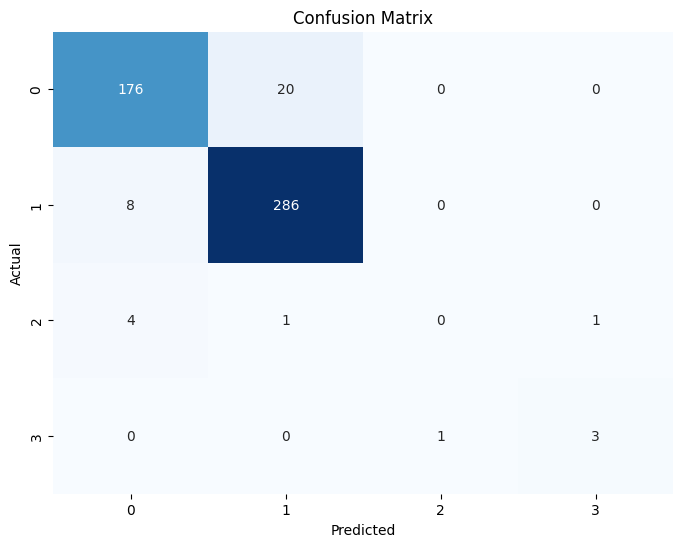

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from /content/CitarumWater.csv
file_path = '/content/CitarumWater.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data preprocessing
# Dropping columns that are not needed for the model such as 'No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2', 'IP'
X = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2', 'IP', 'Class'])
y = data['Class']

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build logistic regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
